In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# train test split y encoding que nos sirve para nuestras variables categóricas convertirlas a numéricas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# algoritmos que vamos a usar de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# métricas de evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#evistar warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


#### preprocesamiento

In [4]:
variables = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'] #seleccion de variables
data = df[variables].copy()

<Axes: >

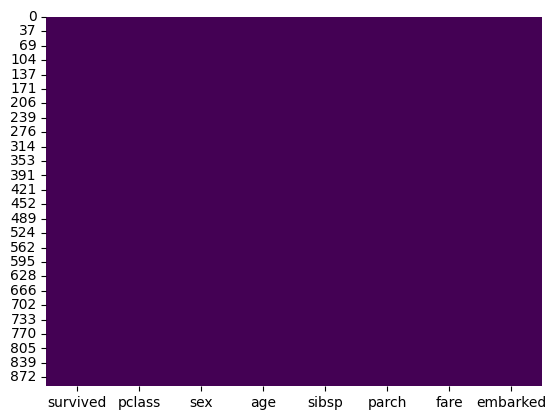

In [29]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

In [6]:
data['age'].fillna(data['age'].mean(), inplace=True) #rellenamos los nulos de la edad con la media

In [7]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
#eliminamos outliers de age y fare con rangos intercuartilicos
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['age'] >= Q1 - 1.5 * IQR) & (data['age'] <= Q3 + 1.5 * IQR)]

Q1_fare = data['fare'].quantile(0.25)
Q3_fare = data['fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
data = data[(data['fare'] >= Q1_fare - 1.5 * IQR_fare) & (data['fare'] <= Q3_fare + 1.5 * IQR_fare)]



In [9]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['embarked'] = le.fit_transform(data['embarked'])

In [10]:
data['sex']

0      1
2      0
3      0
4      1
5      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex, Length: 718, dtype: int64

In [11]:
data['embarked'] 

0      2
2      2
3      2
4      2
5      1
      ..
886    2
887    2
888    2
889    0
890    1
Name: embarked, Length: 718, dtype: int64

#### preparaci'on de datos para entrenamiento

In [12]:
X = data.drop('survived', axis=1)  # Variables independientes
y = data['survived']  # Variable dependiente

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=257)

In [14]:
modelos = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [15]:
resultados = {}

#### entrenamiento

In [16]:
for nombre, modelo in modelos.items():
    #entrenar
    modelo.fit(X_train, y_train)
    #predecir
    y_pred = modelo.predict(X_test)
    #evaluar
    accuracy = accuracy_score(y_test, y_pred)
    resultados[nombre] = accuracy
    print(f"{nombre} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.83
Decision Tree Accuracy: 0.76
Random Forest Accuracy: 0.81
Support Vector Machine Accuracy: 0.68


In [17]:
mejor_modelo_nombre = max(resultados, key=resultados.get)
mejor_modelo_accuracy = resultados[mejor_modelo_nombre]
print(f"\nMejor modelo: {mejor_modelo_nombre} con una precisión de {mejor_modelo_accuracy:.2f}")


Mejor modelo: Logistic Regression con una precisión de 0.83


In [18]:
#entrenar el mejor modelo
mejor_modelo = modelos[mejor_modelo_nombre]
mejor_modelo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
y_pred_final = mejor_modelo.predict(X_test)

In [20]:
print(f"\nPredicciones finales del mejor modelo ({mejor_modelo_nombre}):")
print(y_pred_final)


Predicciones finales del mejor modelo (Logistic Regression):
[0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0]


In [21]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        96
           1       0.73      0.75      0.74        48

    accuracy                           0.83       144
   macro avg       0.80      0.81      0.81       144
weighted avg       0.83      0.83      0.83       144



In [22]:
cm = confusion_matrix(y_test, y_pred_final)

In [23]:
cm

array([[83, 13],
       [12, 36]])

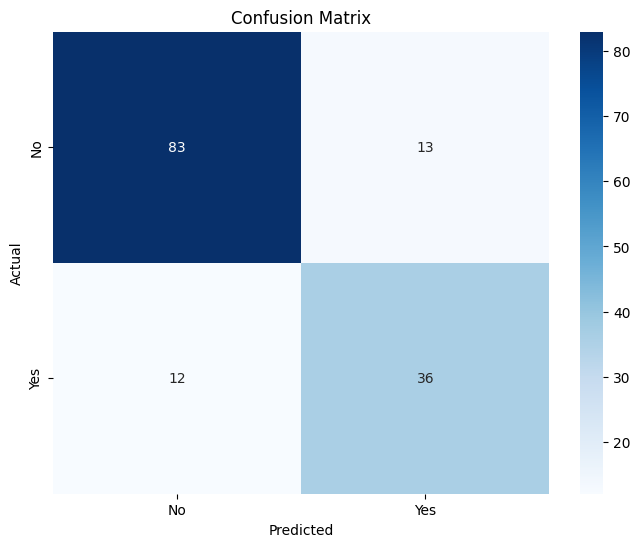

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Predicciones de ejemplo

In [25]:
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.250,2
2,1,3,0,26.0,0,0,7.925,2


In [26]:
pasajero_1 = pd.DataFrame({
    'pclass': [3],
    'sex' : [0],
    'age': [22],
    'sibsp': [0],
    'parch': [0],
    'fare': [7.25],
    'embarked': [2]
})


In [27]:
predicion_1 = mejor_modelo.predict(pasajero_1)[0]
probabilidad_1 = mejor_modelo.predict_proba(pasajero_1)[0][1]

print(f"Predicción para pasajero 1: {'Sobrevivió' if predicion_1 == 1 else 'No sobrevivió'}")
print(f"Probabilidad de supervivencia: {probabilidad_1:.2f}")

Predicción para pasajero 1: Sobrevivió
Probabilidad de supervivencia: 0.62


In [28]:
#salvar el modelo
import joblib
joblib.dump(mejor_modelo, 'mejor_modelo_titanic.pkl')


['mejor_modelo_titanic.pkl']